# Data operation with pandas
Demo, showing python pandas data analysis, visualization and processing library.

Victor Kitov, <v.v.kitov@yandex.ru>, <https://victorkitov.github.io>

# Table of contents

* [Data operation with pandas](#Data-operation-with-pandas)
* [Series](#Series)
 * [Slicing Series](#Slicing-Series)
 * [Combining series](#Combining-series)
 * [Quick Series analysis](#Quick-Series-analysis)
 * [Distribution of Series](#Distribution-of-Series)
  * [Series with continuous values](#Series-with-continuous-values)
  * [Series with discrete values](#Series-with-discrete-values)
* [DataFrame](#DataFrame)
 * [Slicing](#Slicing)
 * [Index by row and column numbers](#Index-by-row-and-column-numbers)
 * [Quick analysis](#Quick-analysis)
 * [Applying functions to DataFrame](#Applying-functions-to-DataFrame)
 * [Database-like joining](#Database-like-joining)
* [Analysing transactional data](#Analysing-transactional-data)
 * [Grouping data](#Grouping-data)
 * [Pivot tables](#Pivot-tables)
 * [Add columns to the hierarchical index](#Add-columns-to-the-hierarchical-index)
* [Visualization of dataframes](#Visualization-of-dataframes)
* [Saving/loading from file](#Saving/loading-from-file)
* [More](#More)

In [1]:
%pylab inline
%precision 3

Populating the interactive namespace from numpy and matplotlib


'%.3f'

In [2]:
import pandas as pd

pandas is a python module, providing easy interpretable operations for 
data analytics and data preprocessing.

Key types:
* Series (a list)
* DataFrame (a matrix)

Also there a less used types for storing 3D and 4D data

# Series

In [14]:
s = pd.Series(['A','B','C','D','E'], index=['a','b','c','d','e'])
s

a    A
b    B
c    C
d    D
e    E
dtype: object

In [15]:
s['b']

'B'

In [16]:
s.iat[1] # first element has index 0, as usual in python

'B'

In [17]:
s.dtype

dtype('O')

In [18]:
s.values  # transform values to numpy array

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [22]:
s.index.values  # transform index to numpy array

array(['a', 'b', 'c', 'd', 'e'], dtype=object)

In [35]:
len(s)

5

## Slicing Series

In [24]:
s[:'c']  # includes last element

a    A
b    B
c    C
dtype: object

In [27]:
s<='C'

a     True
b     True
c     True
d    False
e    False
dtype: bool

In [28]:
s[s<='C']

a    A
b    B
c    C
dtype: object

## Combining series

In [29]:
s.append(s)

a    A
b    B
c    C
d    D
e    E
a    A
b    B
c    C
d    D
e    E
dtype: object

In [31]:
s.append(s, ignore_index=True)  # recreates index by simple numbering of elements

0    A
1    B
2    C
3    D
4    E
5    A
6    B
7    C
8    D
9    E
dtype: object

In [34]:
pd.concat([s,s])   # the same as append

a    A
b    B
c    C
d    D
e    E
a    A
b    B
c    C
d    D
e    E
dtype: object

In [24]:
len(s1),len(s2)

(5, 5)

## Quick Series analysis

In [41]:
s_long = pd.Series(range(1000,2000))  # some long Series

In [42]:
len(s_long)

1000

In [43]:
s_long.head(3)

0    1000
1    1001
2    1002
dtype: int64

In [44]:
s_long.tail(6)

994    1994
995    1995
996    1996
997    1997
998    1998
999    1999
dtype: int64

In [45]:
s_long.describe()

count    1000.000000
mean     1499.500000
std       288.819436
min      1000.000000
25%      1249.750000
50%      1499.500000
75%      1749.250000
max      1999.000000
dtype: float64

Each statistic can be retrieved individually:

In [32]:
s_long.min(), s_long.max(), s_long.mean(), s_long.std(), s_long.median()

(1000, 1999, 1499.500000, 288.819436, 1499.500000)

Python operators also work:

In [33]:
min(s_long), max(s_long), mean(s_long), std(s_long), median(s_long)

(1000, 1999, 1499.500000, 288.674990, 1499.500000)

## Distribution of Series

### Series with continuous values

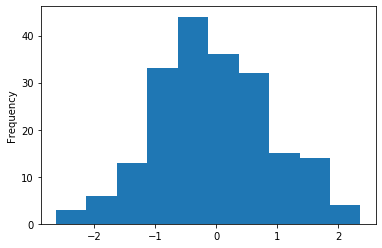

In [25]:
s = pd.Series(randn(200))
s.plot.hist()

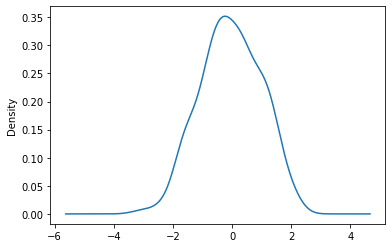

In [26]:
s = pd.Series(randn(200))
s.plot.kde()

### Series with discrete values

In [46]:
s = pd.Series([1,2,3,2,1,1,1])
s

0    1
1    2
2    3
3    2
4    1
5    1
6    1
dtype: int64

In [47]:
unique(s)

array([1, 2, 3])

In [49]:
unique(s, return_counts=1)  # also return occurence count of each unique value

(array([1, 2, 3]), array([4, 2, 1]))

In [50]:
s.value_counts()  # returns unique values and their occurence counts as pandas series

1    4
2    2
3    1
dtype: int64

# DataFrame

DataFrame stores 2D matrix data.
* rows are referenced by index
* columns are referenced by column names

In [84]:
df=pd.DataFrame(diag(range(1,5)),index=['a','b','c','d'], columns=['A','B','C','D'])
df

,A,B,C,D
a,1,0,0,0
b,0,2,0,0
c,0,0,3,0
d,0,0,0,4


In [53]:
df['B'] # select column

a    0
b    2
c    0
d    0
Name: B, dtype: int64

In [55]:
df.B  # also selects column

a    0
b    2
c    0
d    0
Name: B, dtype: int64

In [57]:
df.B.values   # return column values as numpy array

array([0, 2, 0, 0])

In [59]:
df.loc['b']  # references row, returns Series

A    0
B    2
C    0
D    0
Name: b, dtype: int64

In [61]:
df.loc['b'].values    # references row, returns numpy array

array([0, 2, 0, 0])

In [62]:
df.loc['b','B']  # selection by row and column

2

In [64]:
df.at['b','B']   # the same but faster way to return a scalar

2

## Slicing

In [68]:
df

,A,B,C,D
a,1,0,0,0
b,0,2,0,0
c,0,0,3,0
d,0,0,0,4


In [69]:
df[:'b']  # slice by rows, slice end IS included

,A,B,C,D
a,1,0,0,0
b,0,2,0,0


In [70]:
df.loc[:'b'] # slice by rows, slice end IS included

,A,B,C,D
a,1,0,0,0
b,0,2,0,0


In [73]:
df.loc[:,'B':'D']  # slice by columns, slice end IS included

,B,C,D
a,0,0,0
b,2,0,0
c,0,3,0
d,0,0,4


In [76]:
df.loc['b','D']  # select particular element

0

In [78]:
df.at['b','D']  # the same but faster way to extract particular element

0

In [48]:
df.iloc[1:3]            # excludes ending index 3

,col_1,col_2,col_3,col_4
row_2,0,2,0,0
row_3,0,0,3,0


In [49]:
df.at['row_3','col_3']

3

In [172]:
# df.reindex - extend DataFrame with new index or columns values

In [ ]:
# pd.get_dummies(df) - get one-hot encoding representation for discrete columns

## Index by row and column numbers

In [79]:
df

,A,B,C,D
a,1,0,0,0
b,0,2,0,0
c,0,0,3,0
d,0,0,0,4


In [80]:
df.iloc[1]  # 2nd row

A    0
B    2
C    0
D    0
Name: b, dtype: int64

In [81]:
df.iloc[:,1]   # 2nd column

a    0
b    2
c    0
d    0
Name: B, dtype: int64

In [82]:
df.iloc[1,1]

2

In [83]:
df.iat[1,1]  #  the same but works faster to extract a scalar

2

In [51]:
df.index  # returns pandas Index object

Index(['row_1', 'row_2', 'row_3', 'row_4'], dtype='object')

In [52]:
df.index.values   # returns index as numpy array

array(['row_1', 'row_2', 'row_3', 'row_4'], dtype=object)

In [53]:
df.columns   # returns columns as pandas Index object

Index(['col_1', 'col_2', 'col_3', 'col_4'], dtype='object')

In [54]:
df.columns.values   # returns columns as numpy array

array(['col_1', 'col_2', 'col_3', 'col_4'], dtype=object)

In [61]:
df.T  # transpose, i.e. exchange rows and columns

,row_1,row_2,row_3,row_4
col_1,1.0,0.0,0.0,0.0
col_2,NaN,2.0,0.0,0.0
col_3,0.0,0.0,3.0,0.0
col_4,0.0,0.0,0.0,4.0


## Quick analysis

In [55]:
long_df=pd.DataFrame(randn(1000,4),columns=['feature_%s'%i for i in range(1,5)])

In [56]:
long_df.head()

,feature_1,feature_2,feature_3,feature_4
0,0.105561,-0.547709,1.506815,0.348936
1,0.101904,1.156399,-0.481209,1.991523
2,0.254956,-1.124846,0.163751,-0.678125
3,-0.807099,0.148343,0.147144,-0.174931
4,0.660957,1.842885,2.044077,0.831365


In [57]:
long_df.tail()

,feature_1,feature_2,feature_3,feature_4
995,1.609263,-1.369085,-1.516245,0.129294
996,-1.034717,0.618148,-0.858275,-0.876029
997,0.472390,1.135086,0.383165,1.645129
998,0.317389,1.434133,1.045534,0.928838
999,-0.037075,-0.551868,-0.090204,-1.224008


In [58]:
long_df.head(3)

,feature_1,feature_2,feature_3,feature_4
0,0.105561,-0.547709,1.506815,0.348936
1,0.101904,1.156399,-0.481209,1.991523
2,0.254956,-1.124846,0.163751,-0.678125


In [60]:
df.describe()  # count describes the number of not-nan values

,col_1,col_2,col_3,col_4
count,4.00,3.000000,4.00,4.0
mean,0.25,0.666667,0.75,1.0
std,0.50,1.154701,1.50,2.0
min,0.00,0.000000,0.00,0.0
25%,0.00,0.000000,0.00,0.0
50%,0.00,0.000000,0.00,0.0
75%,0.25,1.000000,0.75,1.0
max,1.00,2.000000,3.00,4.0


In [62]:
df.mean()  # along 0 dimension (rows), mean for each column

col_1    0.250000
col_2    0.666667
col_3    0.750000
col_4    1.000000
dtype: float64

In [63]:
df.mean(axis=1)  # mean along 1st dimension (columns), mean for each row

row_1    0.333333
row_2    0.500000
row_3    0.750000
row_4    1.000000
dtype: float64

In [85]:
pd.concat([df,df])

,A,B,C,D
a,1,0,0,0
b,0,2,0,0
c,0,0,3,0
d,0,0,0,4
a,1,0,0,0
b,0,2,0,0
c,0,0,3,0
d,0,0,0,4


In [86]:
df.append(df)  # the same

,A,B,C,D
a,1,0,0,0
b,0,2,0,0
c,0,0,3,0
d,0,0,0,4
a,1,0,0,0
b,0,2,0,0
c,0,0,3,0
d,0,0,0,4


In [87]:
df.append(df, ignore_index=True)  # recreates index as 0,1,2,3,... by enumerating rows

,A,B,C,D
0,1,0,0,0
1,0,2,0,0
2,0,0,3,0
3,0,0,0,4
4,1,0,0,0
5,0,2,0,0
6,0,0,3,0
7,0,0,0,4


## Applying functions to DataFrame

In [159]:
df=pd.DataFrame({'A':arange(5),'B':arange(10,15)})
df

,A,B
0,0,10
1,1,11
2,2,12
3,3,13
4,4,14


In [160]:
df.apply(lambda x:x**2)  # applies for each column

,A,B
0,0,100
1,1,121
2,4,144
3,9,169
4,16,196


In [161]:
df.apply(lambda x:max(x))   # applies for each column

A     4
B    14
dtype: int64

In [162]:
df.apply(lambda x:cumsum(x))   # applies for each column

,A,B
0,0,10
1,1,21
2,3,33
3,6,46
4,10,60


In [164]:
df.T.apply(lambda x:max(x))   # apply to each row

0    10
1    11
2    12
3    13
4    14
dtype: int64

In [165]:
df.apply(lambda x:max(x), axis=1)   # the same: apply to each row

0    10
1    11
2    12
3    13
4    14
dtype: int64

## Database-like joining

In [92]:
left = pd.DataFrame({'name':['Bob','Alice','Sara','John'],'age':[23,34,27,18]})
left

,name,age
0,Bob,23
1,Alice,34
2,Sara,27
3,John,18


In [95]:
right = pd.DataFrame({'name':['Andrew','Alice','Sara','John'], 'height':[185,170,180,165]})
right

,name,height
0,Andrew,185
1,Alice,170
2,Sara,180
3,John,165


In [96]:
pd.merge(left, right, on='name')

,name,age,height
0,Alice,34,170
1,Sara,27,180
2,John,18,165


In [99]:
pd.merge(left, right, on='name', how='outer')

,name,age,height
0,Bob,23.0,NaN
1,Alice,34.0,170.0
2,Sara,27.0,180.0
3,John,18.0,165.0
4,Andrew,NaN,185.0


**how='left'**: take all entries from left and matching from right DataFrame

**how='right'**: take all entries from right and matching from left DataFrame    

# Analysing transactional data

In [171]:
df=pd.DataFrame({'Date':pd.date_range('20200101', periods=8),
                'City':['Moscow','Moscow','London','Moscow','London','Moscow','London','Moscow'],
                'Sex':['Male','Female']*4,
                'Payment':['cash','card','cash','card','cash','card','card','cash'],
                'Amount':[100,80,200,150,130,120,320,140]})
df

,Date,City,Sex,Payment,Amount
0,2020-01-01,Moscow,Male,cash,100
1,2020-01-02,Moscow,Female,card,80
2,2020-01-03,London,Male,cash,200
3,2020-01-04,Moscow,Female,card,150
4,2020-01-05,London,Male,cash,130
5,2020-01-06,Moscow,Female,card,120
6,2020-01-07,London,Male,card,320
7,2020-01-08,Moscow,Female,cash,140


## Grouping data

In [168]:
df.groupby('Sex').sum()

,Amount
Sex,
Female,490
Male,750


In [169]:
df.groupby(['City','Sex']).sum()

Amount
City   Sex           
London Male       650
Moscow Female     490
       Male       100

## Pivot tables

In [170]:
df

,Date,City,Sex,Payment,Amount
0,2020-01-01,Moscow,Male,cash,100
1,2020-01-02,Moscow,Female,card,80
2,2020-01-03,London,Male,cash,200
3,2020-01-04,Moscow,Female,card,150
4,2020-01-05,London,Male,cash,130
5,2020-01-06,Moscow,Female,card,120
6,2020-01-07,London,Male,card,320
7,2020-01-08,Moscow,Female,cash,140


In [112]:
pd.pivot_table(df, index=['City'], columns=['Sex'], values=['Amount'], aggfunc=np.sum, margins=True)

Amount             
Sex    Female   Male   All
City                      
London    NaN  650.0   650
Moscow  490.0  100.0   590
All     490.0  750.0  1240

We see that most revenue was generated by male clients from London.

But female clients from London didn't bring any revenue!

London gives more revenue overall than Moscow.

In [113]:
pd.pivot_table(df, index=['City'], columns=['Sex','Payment'], values=['Amount'], aggfunc=np.sum, margins=True)

Amount                           
Sex     Female          Male          All
Payment   card   cash   card   cash      
City                                     
London     NaN    NaN  320.0  330.0   650
Moscow   350.0  140.0    NaN  100.0   590
All      350.0  140.0  320.0  430.0  1240

Greatest revenue is generated by female clients paying by card from Moscow.

In [115]:
pd.crosstab(df['City'], df['Payment'])

Payment,card,cash
City,,
London,1,2
Moscow,3,2


There was only 1 transaction by card in London.

Number of payments by cash in London and Moscow are equal.

In [117]:
pd.crosstab([df['City'], df['Sex']], df['Payment'])

Payment        card  cash
City   Sex               
London Male       1     2
Moscow Female     3     1
       Male       0     1

Most common payment type is by females from Moscow with cash.

Can compare of relative proportions of events:

In [122]:
pd.crosstab([df['City'], df['Sex']], df['Payment'], normalize='columns')

Payment        card  cash
City   Sex               
London Male    0.25  0.50
Moscow Female  0.75  0.25
       Male    0.00  0.25

## Add columns to the hierarchical index

In [148]:
p = pd.pivot_table(df, index=['City'], columns=['Sex','Payment'], values=['Amount'], aggfunc=np.sum)
p

Amount                     
Sex     Female          Male       
Payment   card   cash   card   cash
City                               
London     NaN    NaN  320.0  330.0
Moscow   350.0  140.0    NaN  100.0

Transfer columns to index:

In [139]:
p2 = p.stack(['Sex','Payment'])
p2

Amount
City   Sex    Payment        
London Male   card      320.0
              cash      330.0
Moscow Female card      350.0
              cash      140.0
       Male   cash      100.0

Now can easily access individual values:

In [153]:
p2.loc['London','Male','cash']

Amount    330.0
Name: (London, Male, cash), dtype: float64

# Visualization of dataframes

In [37]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['A', 'B', 'C', 'D'])

In [59]:
df=pd.DataFrame(diag(range(1,5)),index=['row_1','row_2','row_3','row_4'], columns=['col_1','col_2','col_3','col_4'], dtype=float)
df.at['row_1','col_2']=NaN
df

,col_1,col_2,col_3,col_4
row_1,1.0,NaN,0.0,0.0
row_2,0.0,2.0,0.0,0.0
row_3,0.0,0.0,3.0,0.0
row_4,0.0,0.0,0.0,4.0


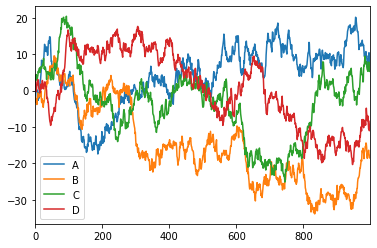

In [38]:
df = df.cumsum()
df.plot();

In [91]:
df = pd.DataFrame({'Boys height':[130,145,180],'Girls height':[140,150,160]},index=[1,2,3])
df

,Boys height,Girls height
1,130,140
2,145,150
3,180,160


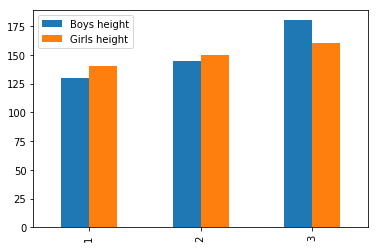

In [92]:
df.plot.bar();

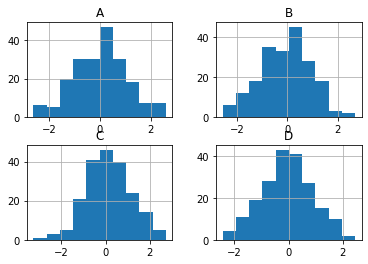

In [39]:
df = pd.DataFrame(np.random.randn(200, 4), columns=['A', 'B', 'C', 'D'])

df.hist();

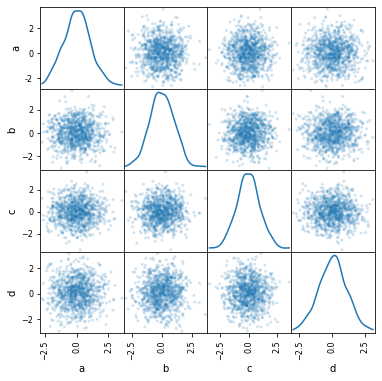

In [41]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])

pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde');

# Saving/loading from file

In [95]:
df=pd.DataFrame(eye(3),columns=['a','b','c'])
df

,a,b,c
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [96]:
df.to_csv('foo.csv')

In [ ]:
df=pd.read_csv('foo.csv')
df

# More

* [10 Minutes to pandas tutorial](http://pandas.pydata.org/pandas-docs/stable/10min.html)